In [1]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns
# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps
import mysql.connector

cnx = mysql.connector.connect(user='sae', password='mdp_sae', host='127.0.0.1', database='bd_sae')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete_tout= """
SELECT * 
FROM obs_chouette,chouette
WHERE leNumIndividu = numIndividu
"""
ma_requete_hotte= """
SELECT * 
FROM obs_chouette,chouette
WHERE leNumIndividu = numIndividu
AND espece = 'Hulotte'
"""

ma_requete_Che= """
SELECT * 
FROM obs_chouette,chouette
WHERE leNumIndividu = numIndividu
AND espece = 'Cheveche'
"""
ma_requete_Eff= """
SELECT * 
FROM obs_chouette,chouette
WHERE leNumIndividu = numIndividu
AND espece = 'Effraie'
"""
    
df = pd.read_sql_query(ma_requete_tout, cnx)
dfhotte = pd.read_sql_query(ma_requete_hotte, cnx)
dfChe = pd.read_sql_query(ma_requete_Che, cnx)
dfEff = pd.read_sql_query(ma_requete_Eff, cnx)

# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

# on affiche le DataFrame
df

('aobserve',)
('chouette',)
('lieu',)
('lieu_vegetation',)
('nid_gci',)
('obs_batracien',)
('obs_chouette',)
('obs_gci',)
('obs_hippocampe',)
('obs_loutre',)
('observateur',)
('observation',)
('vegetation',)
('zonehumide',)


protocole typeObs leNumIndividu  numObs numIndividu   espece     sexe
0            1  Sonore         135-1     183       135-1  Hulotte     male
1            1  Sonore         135-2     184       135-2  Hulotte  femelle
2            1  Sonore         137-1     269       137-1  Hulotte     male
3            1  Sonore       139-1-1     206     139-1-1  Hulotte     male
4            1  Sonore       139-1-2     207     139-1-2  Hulotte     male
..         ...     ...           ...     ...         ...      ...      ...
593          1  Sonore         519-3     139       519-3  Hulotte     male
594          1  Sonore       521-1-1     170     521-1-1  Hulotte     male
595          1  Sonore       521-1-2     171     521-1-2  Hulotte     male
596          1  Sonore       521-2-1     172     521-2-1  Hulotte  femelle
597          1  Sonore       521-2-2     173     521-2-2  Hulotte  femelle

[598 rows x 7 columns]

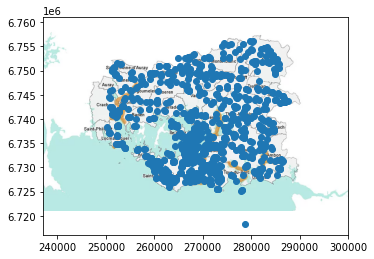

In [158]:
cnx = mysql.connector.connect(user='sae', password='mdp_sae', host='127.0.0.1', database='bd_sae')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete_X= """
SELECT Coord_Lambert_X 
FROM Lieu 
WHERE Coord_Lambert_X > 250000 AND  Coord_Lambert_Y < 6900000
"""
ma_requete_Y= """
SELECT Coord_Lambert_Y 
FROM Lieu 
WHERE Coord_Lambert_X > 250000 AND  Coord_Lambert_Y < 6900000
"""

    
carteX = pd.read_sql_query(ma_requete_X, cnx)
carteY = pd.read_sql_query(ma_requete_Y, cnx)


# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = plt.imread('Graphe.PNG', format='PNG')

#ax.set_xlim(250000,6900000)
#ax.set_ylim(250000,6900000)

ax.imshow(img,origin='upper',extent= [237000,300000,6721000,6761000])
ax.scatter(carteX,carteY)
# on affiche le DataFrame

plt.show()

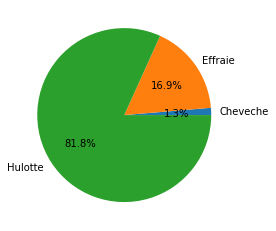

In [90]:
dfr = df.groupby(["espece"])["espece"].count() # Répartion des especes
dfr
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

In [5]:
dft = pd.crosstab(df["typeObs"],df["sexe"],margins = False) # Croisement entre les espece et les sexes
dft

sexe              femelle  inconnu  male
typeObs                                 
Sonore                119      137   225
Sonore et Visuel       15       27    30
Visuel                  3       27    15

In [25]:
dfe = pd.crosstab(df["typeObs"],df["espece"],margins = False) # Croisement entre les espece et les types observations
dfe.

espece            Cheveche  Effraie  Hulotte
typeObs                                     
Sonore                   8       53      420
Sonore et Visuel         0       27       45
Visuel                   0       21       24

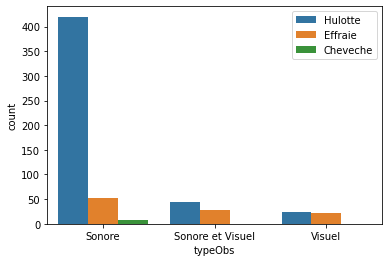

In [29]:
sns.countplot(x='typeObs', hue='espece', data=df) # Croisement entre les especes et les types observations

plt.legend(loc='upper right')
plt.show()

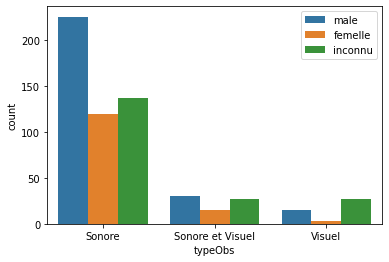

In [33]:
sns.countplot(x='typeObs', hue='sexe', data=df) # Croisement entre les sexes et les types observations

plt.legend(loc='upper right')
plt.show()

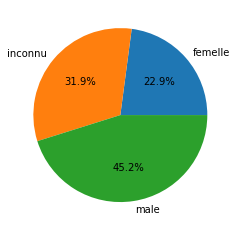

In [40]:
dfx = df.groupby(["sexe"])['sexe'].count() # repartition des sexes 
dfx
Grap = plt.pie(dfx, labels=dfx.index, autopct='%1.1f%%')

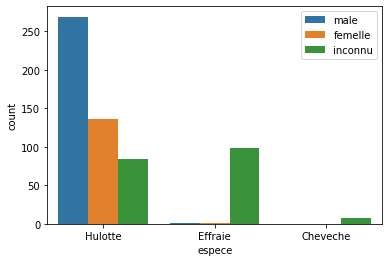

In [37]:
sns.countplot(x='espece', hue='sexe', data=df) # Croisement entre les espece et les sexes

plt.legend(loc='upper right')
plt.show()

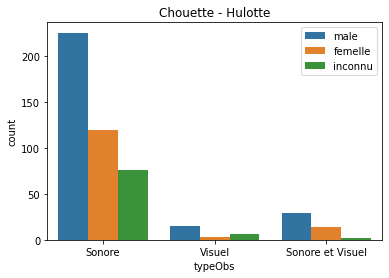

In [32]:
sns.countplot(x='typeObs', hue='sexe', data=dfhotte) # Vision du type d'observation trie par le sexe de l'animal sur l'espece Hulotte
plt.title('Chouette - Hulotte')
plt.legend(loc='upper right')


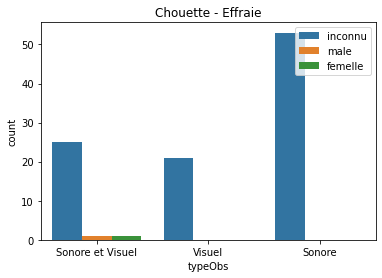

In [42]:
sns.countplot(x='typeObs', hue='sexe', data=dfEff) 
# Vision du type d'observation trie par le sexe de l'animal  sur l'espece Effraie
plt.title('Chouette - Effraie')
plt.legend(loc='upper right')
plt.show()

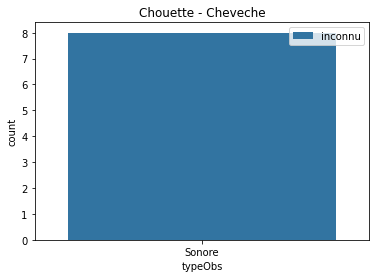

In [34]:
sns.countplot(x='typeObs', hue='sexe', data=dfChe) 
# Vision du type d'observation trie par le sexe de l'animal sur l'espece Cheveche
plt.title('Chouette - Cheveche')
plt.legend(loc='upper right')
plt.show()

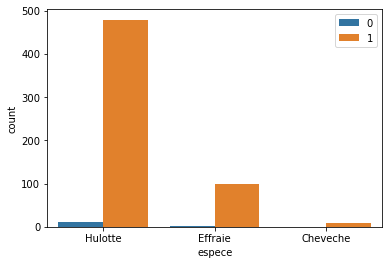

In [36]:
sns.countplot(x='espece', hue='protocole', data=df) 
# Le protocole utilisé trie par le espèce

plt.legend(loc='upper right')
plt.show()

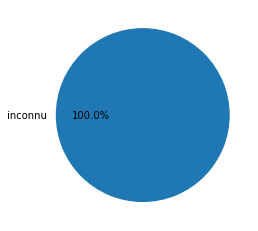

In [39]:
dfx = dfChe.groupby(["sexe"])['sexe'].count() # Compte des sexes sur l'espece Cheveche
dfx
Grap = plt.pie(dfx, labels=dfx.index, autopct='%1.1f%%')
plt.title('Chouette - Cheveche')

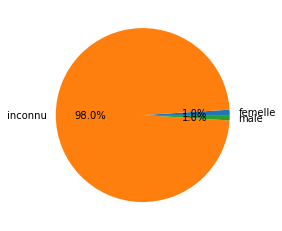

In [41]:
dfx = dfEff.groupby(["sexe"])['sexe'].count() # Compte des sexes sur l'espece Effraie
dfx
Grap = plt.pie(dfx, labels=dfx.index, autopct='%1.1f%%')
plt.title('Chouette - Effraie')

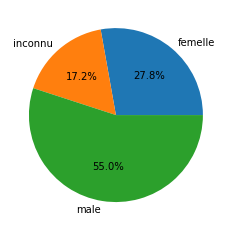

In [42]:
dfx = dfhotte.groupby(["sexe"])['sexe'].count() # Compte des sexes sur l'espece Hulotte
dfx
Grap = plt.pie(dfx, labels=dfx.index, autopct='%1.1f%%')
plt.title('Chouette - Effraie')

In [31]:
cnx = mysql.connector.connect(user='sae', password='mdp_sae', host='127.0.0.1', database='bd_sae')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete_tout= """
SELECT * 
FROM obs_hippocampe
"""
ma_requete_Syng= """
SELECT * 
FROM obs_hippocampe
WHERE espece = 'Syngnathus acus'
"""

ma_requete_guttu= """
SELECT * 
FROM obs_hippocampe
WHERE espece = 'Hippocampus guttulatus'
"""
ma_requete_Taille= """
SELECT * 
FROM obs_hippocampe
WHERE taille IS NOT NULL
"""
ma_requete_Fem= """
SELECT * 
FROM obs_hippocampe
WHERE gestant = 1
"""
dfHiopp = pd.read_sql_query(ma_requete_tout, cnx)
dfSyng = pd.read_sql_query(ma_requete_Syng, cnx)
dfguttu = pd.read_sql_query(ma_requete_guttu, cnx)
dftaille = pd.read_sql_query(ma_requete_Taille, cnx)
dffem = pd.read_sql_query(ma_requete_Fem, cnx)
# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

dfHiopp

('aobserve',)
('chouette',)
('lieu',)
('lieu_vegetation',)
('nid_gci',)
('obs_batracien',)
('obs_chouette',)
('obs_gci',)
('obs_hippocampe',)
('obs_loutre',)
('observateur',)
('observation',)
('vegetation',)
('zonehumide',)


obsH                  espece     sexe  temperatureEau         typePeche  \
0      890         Syngnathus acus  femelle            10.0   casierCrevettes   
1      891         Syngnathus acus  femelle            10.0   casierCrevettes   
2      892         Syngnathus acus  femelle            10.0   casierCrevettes   
3      893         Syngnathus acus  femelle            10.0   casierCrevettes   
4      894         Syngnathus acus  femelle            10.0   casierCrevettes   
...    ...                     ...      ...             ...               ...   
1234  2124  Hippocampus guttulatus  femelle            15.0  verveuxAnguilles   
1235  2125  Hippocampus guttulatus     male            15.0  verveuxAnguilles   
1236  2126         Syngnathus acus  femelle            15.0  verveuxAnguilles   
1237  2127         Syngnathus acus     male            15.0  verveuxAnguilles   
1238  2128         Syngnathus acus  femelle            15.0  verveuxAnguilles   

      taille  gestant  
0        NaN        0  
1        NaN        0  
2        NaN        0  
3        NaN        0  
4        NaN        0  
...      ...      ...  
1234    15.0        0  
1235    16.0        0  
1236    33.0        0  
1237    37.0        0  
1238    37.0        0  

[1239 rows x 7 columns]

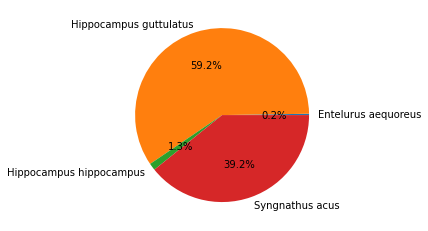

In [83]:
dfr = dfHiopp.groupby(["espece"])["espece"].count() 
# Compte des especes
dfr
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

In [84]:
dft = pd.crosstab(dfHiopp["espece"],dfHiopp["sexe"],margins = True) 
# Répartition des especes trie par le sexe
dft

sexe                     femelle  inconnu  male   All
espece                                               
Entelurus aequoreus            1        0     2     3
Hippocampus guttulatus       391        1   332   724
Hippocampus hippocampus        6        0    10    16
Syngnathus acus              416        9    54   479
All                          814       10   398  1222

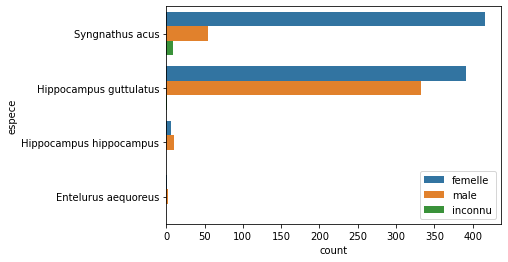

In [123]:
sns.countplot(y='espece', hue='sexe', data=dfHiopp)  
# Compte des especes trie par le sexe

plt.legend(loc='lower right')
plt.show()

In [86]:
dft = pd.crosstab(dfHiopp["espece"],dfHiopp["typePeche"],margins = True) # croisement etre des especes et le type de peche
dft

typePeche                casierCrevettes  casierMorgates  petitFilet  \
espece                                                                 
Entelurus aequoreus                    0               1           0   
Hippocampus guttulatus                10             193           4   
Hippocampus hippocampus                0              11           0   
Syngnathus acus                       21             392           0   
All                                   31             597           4   

typePeche                verveuxAnguilles   All  
espece                                           
Entelurus aequoreus                     2     3  
Hippocampus guttulatus                513   720  
Hippocampus hippocampus                 5    16  
Syngnathus acus                        66   479  
All                                   586  1218

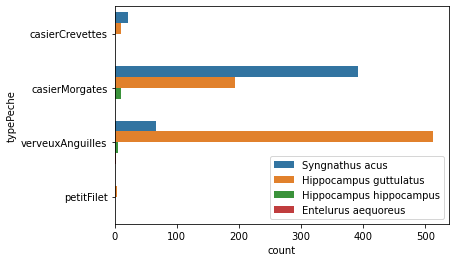

In [87]:
sns.countplot(y='typePeche', hue='espece', data=dfHiopp)  
# Compte des especes trie par le type de peche

plt.legend(loc='lower right')
plt.show()

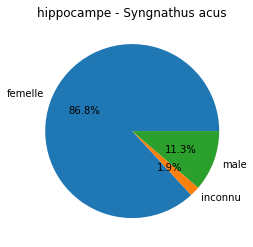

In [93]:
dfr = dfSyng.groupby(["sexe"])["espece"].count() 
# Compte du sexe de espece Syngnathus acus
dfr
plt.title('hippocampe - Syngnathus acus')
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

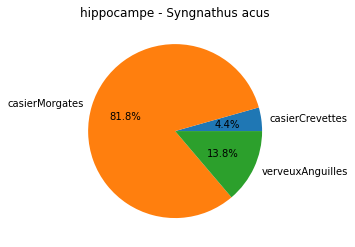

In [92]:
dfr = dfSyng.groupby(["typePeche"])["espece"].count() 
# Compte du type de pehce dans les espece Syngnathus acus
dfr
plt.title('hippocampe - Syngnathus acus')
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

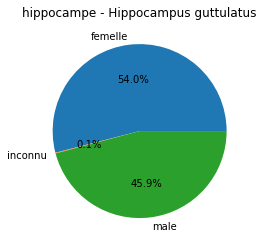

In [94]:
dfr = dfguttu.groupby(["sexe"])["espece"].count() 
# Compte du sexe de espece Hippocampus guttulatus
dfr
plt.title('hippocampe - Hippocampus guttulatus')
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

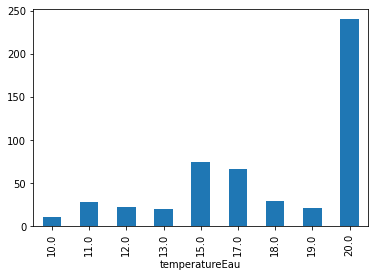

In [127]:
dfr = dfHiopp.groupby(["temperatureEau"])["temperatureEau"].count() 
# Répartion de la température entre tout les hippocamps
dfr
Grap = dfr.plot.bar()

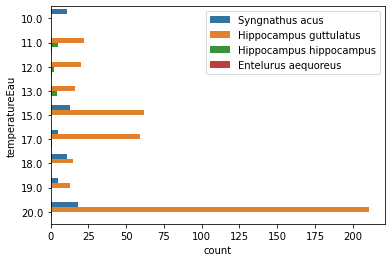

In [32]:
sns.countplot(y='temperatureEau', hue='espece', data=dfHiopp) 
# Compte de espece trie par la température

plt.legend(loc='upper right')
plt.show()

C:\Users\Trive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


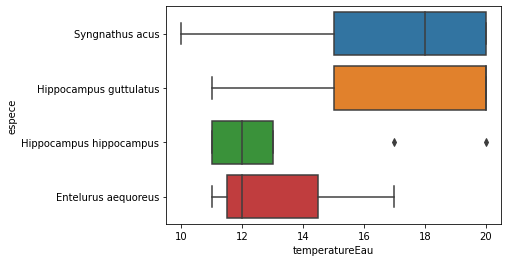

In [120]:
#Variation des Températures de l'eau par espece 
sns.boxplot(dfHiopp["temperatureEau"], dfHiopp["espece"])
plt.show()

C:\Users\Trive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


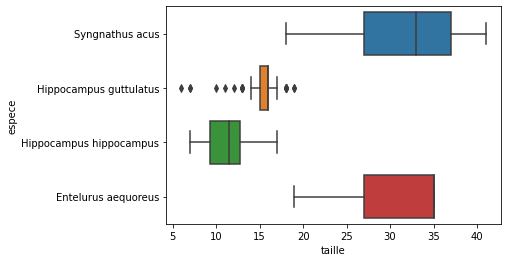

In [119]:
#Variation Taille par espece 
sns.boxplot(dftaille["taille"], dftaille["espece"])

plt.show()

In [10]:
cnx = mysql.connector.connect(user='sae', password='mdp_sae', host='127.0.0.1', database='bd_sae')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete_tout= """
SELECT *
FROM Obs_Batracien
        JOIN ZoneHumide ON concerne_ZH = zh_id
        JOIN Vegetation ON idVege = concernes_vege
"""
ma_requete_cala= """
SELECT * 
FROM Obs_Batracien
        JOIN ZoneHumide ON concerne_ZH = zh_id
        JOIN Vegetation ON idVege = concernes_vege
WHERE espece = 'calamite'
"""

ma_requete_pelo= """
SELECT * 
FROM Obs_Batracien
        JOIN ZoneHumide ON concerne_ZH = zh_id
        JOIN Vegetation ON idVege = concernes_vege
WHERE espece = 'pelodyte'
"""
ma_requete_DeNombre= """
SELECT * 
FROM Obs_Batracien
        JOIN ZoneHumide ON concerne_ZH = zh_id
        JOIN Vegetation ON idVege = concernes_vege
WHERE nombreAdultes > 0
"""

dfbatra = pd.read_sql_query(ma_requete_tout, cnx)
dfcala = pd.read_sql_query(ma_requete_cala, cnx)
dfpelo = pd.read_sql_query(ma_requete_pelo, cnx)
dfDeNombre = pd.read_sql_query(ma_requete_DeNombre, cnx)
# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

dfbatra


('aobserve',)
('chouette',)
('lieu',)
('lieu_vegetation',)
('nid_gci',)
('obs_batracien',)
('obs_chouette',)
('obs_gci',)
('obs_hippocampe',)
('obs_loutre',)
('observateur',)
('observation',)
('vegetation',)
('zonehumide',)


obsB    espece  nombreAdultes  nombreAmplexus  nombrePonte  nombreTetard  \
0       1  calamite            0.0             0.0          0.0           0.0   
1       1  pelodyte            0.0             0.0          0.0           0.0   
2       2  calamite            0.0             0.0          0.0           0.0   
3       2  pelodyte            0.0             0.0          0.0           0.0   
4       3  calamite            3.0             0.0          0.0           0.0   
..    ...       ...            ...             ...          ...           ...   
159    80  pelodyte            NaN             NaN          NaN           NaN   
160    81  calamite            0.0             0.0          0.0           0.0   
161    81  pelodyte            0.0             0.0          0.0           0.0   
162    82  calamite            NaN             NaN          NaN           NaN   
163    82  pelodyte            NaN             NaN          NaN           NaN   

     temperature meteo_ciel meteo_temp meteo_vent  ... zh_temporaire  \
0            7.0     dégagé       None      léger  ...             1   
1            7.0     dégagé       None      léger  ...             1   
2            8.0    nuageux       None       None  ...             1   
3            8.0    nuageux       None       None  ...             1   
4            8.0     dégagé       None       None  ...             1   
..           ...        ...        ...        ...  ...           ...   
159          NaN       None       None       None  ...             1   
160         12.0    nuageux       None       None  ...             0   
161         12.0    nuageux       None       None  ...             0   
162          NaN       None       None       None  ...             0   
163          NaN       None       None       None  ...             0   

     zh_profondeur  zh_surface  zh_typeMare  zh_pente  zh_ouverture  idVege  \
0             60.0       100.0      Prairie     Douce       Abritee       1   
1             60.0       100.0      Prairie     Douce       Abritee       1   
2             15.0        20.0         None   Abrupte       Abritee       2   
3             15.0        20.0         None   Abrupte       Abritee       2   
4             40.0        25.0         None     Douce          None       3   
..             ...         ...          ...       ...           ...     ...   
159           20.0        40.0       Marais      None       Abritee      80   
160           50.0        25.0       Marais     Douce       Abritee      81   
161           50.0        25.0       Marais     Douce       Abritee      81   
162            1.0       100.0       Marais      None       Abritee      82   
163            1.0       100.0       Marais      None       Abritee      82   

        natureVege               vegetation decrit_LieuVege  
0    environnement          Prairie,Fourrés               1  
1    environnement          Prairie,Fourrés               1  
2    environnement                  Prairie               2  
3    environnement                  Prairie               2  
4    environnement  Prairie,Culture,Fourrés               3  
..             ...                      ...             ...  
159  environnement          Culture,Autres               80  
160  environnement          Prairie,Fourrés              81  
161  environnement          Prairie,Fourrés              81  
162  environnement                   Autres              82  
163  environnement                   Autres              82  

[164 rows x 24 columns]

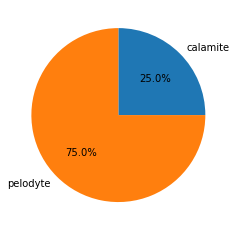

In [13]:
dfr = dfDeNombre.groupby(["espece"])["espece"].count() 
# Répartition des especes
dfr
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

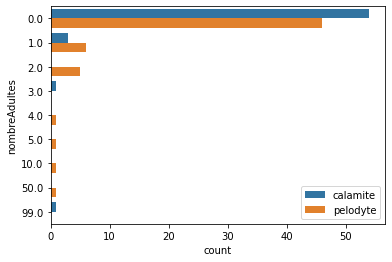

In [12]:

sns.countplot(y='nombreAdultes', hue='espece', data=dfbatra) 
# Compte du nombreAdultes par espece de batracien

plt.legend(loc='lower right')
plt.show()



In [20]:
dfe = pd.crosstab(dfbatra["espece"],dfbatra["nombreAdultes"],margins = False) # Croisement entre les espece et les types observations
dfe
dfnew = dfe.assign(TotaleNombre=(106,75))
dfnew

nombreAdultes  0.0  1.0  2.0  3.0  4.0  5.0  10.0  50.0  99.0  TotaleNombre
espece                                                                     
calamite        54    3    0    1    0    0     0     0     1           106
pelodyte        46    6    5    0    1    1     1     1     0            75

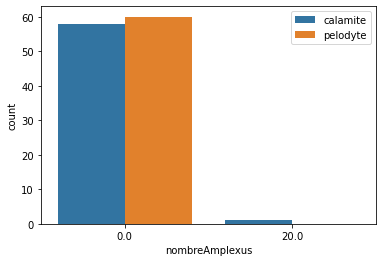

In [13]:

sns.countplot(x='nombreAmplexus', hue='espece', data=dfbatra) 
# Compte du nombreAmplexus par espece de batracien

plt.legend(loc='upper right')
plt.show()

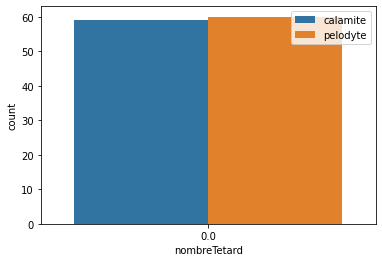

In [15]:

sns.countplot(x='nombreTetard', hue='espece', data=dfbatra) 
# Compte du nombreTetard par espece de batracien

plt.legend(loc='upper right')
plt.show()

C:\Users\Trive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


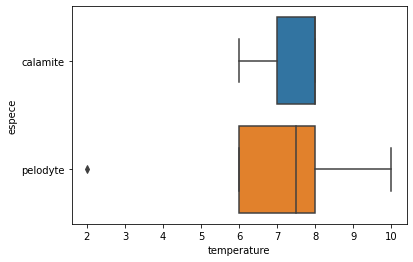

In [26]:
#Variation des Températures par espece 
sns.boxplot(dfDeNombre["temperature"], dfDeNombre["espece"])
plt.show()

No handles with labels found to put in legend.


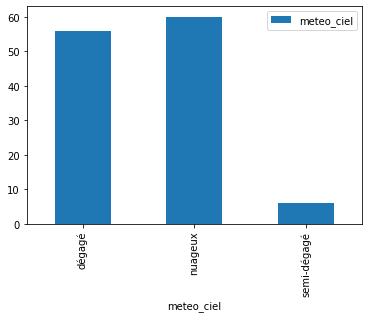

In [29]:

#sns.countplot(x='meteo_ciel', hue='espece', data=dfbatra) 


#plt.show()
dfr = dfbatra.groupby(["meteo_ciel"])["meteo_ciel"].count() 

dfr
# Compte des meteos sur les observation
Grap = dfr.plot.bar()
plt.legend(loc='upper right')

C:\Users\Trive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


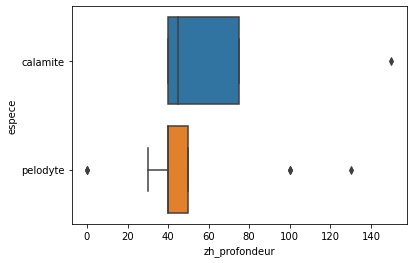

In [25]:
#Variation des profonders par espece 
sns.boxplot(dfDeNombre["zh_profondeur"], dfDeNombre["espece"])
plt.show()

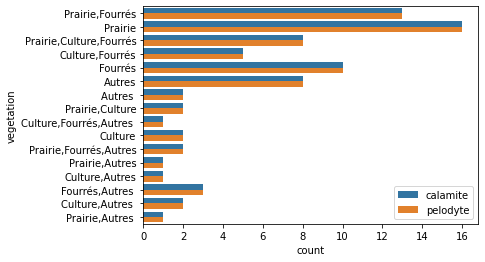

In [34]:

sns.countplot(y='vegetation', hue='espece', data=dfbatra) 
# compte de vegetation trie par l'espece

plt.legend(loc='lower right')
plt.show()

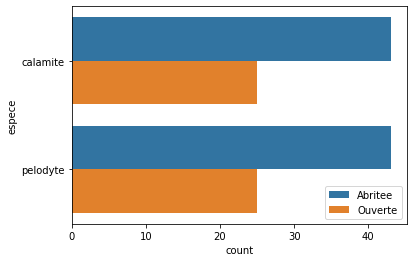

In [36]:

sns.countplot(y='espece', hue='zh_ouverture', data=dfbatra) 
# compte de espece trie par zh_ouverture

plt.legend(loc='lower right')
plt.show()

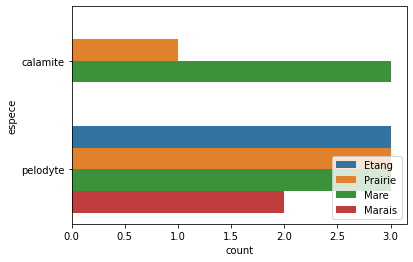

In [24]:

sns.countplot(y='espece', hue='zh_typeMare', data=dfDeNombre) 
# Compte de espece trie par la typeMare

plt.legend(loc='lower right')
plt.show()

In [48]:
cnx = mysql.connector.connect(user='sae', password='mdp_sae', host='127.0.0.1', database='bd_sae')

# on peut alors afficher toutes les tables de la base de données

mycursor =cnx.cursor() 
mycursor.execute("SHOW TABLES")
myresult = mycursor.fetchall() 
  
for x in myresult: 
    print(x)  

# on peut aussi charger le résultat d'une requête dans un DataFrame

### l'utilisation de """ """ permet de présenter la requête SQL sur plusieurs lignes comme d'habitude
ma_requete_tout= """
SELECT *
FROM obs_gci
        JOIN nid_gci ON idNid = leNid
"""


dfgci = pd.read_sql_query(ma_requete_tout, cnx)


# /!\ on n'oublie pas de fermer la connexion à la base
cnx.close()

dfgci


('aobserve',)
('chouette',)
('lieu',)
('lieu_vegetation',)
('nid_gci',)
('obs_batracien',)
('obs_chouette',)
('obs_gci',)
('obs_hippocampe',)
('obs_loutre',)
('observateur',)
('observation',)
('vegetation',)
('zonehumide',)


obsG   nature  nombre presentMaisNonObs  leNid  idNid   nomPlage  \
0    812     oeuf       3              None      1      1  LANDREZAC   
1    813      nid       0              None      1      1  LANDREZAC   
2    814     oeuf       2              None      2      2   BEG LAnn   
3    815      nid       0              None      2      2   BEG LAnn   
4    816     oeuf       3              None      3      3     SALINE   
..   ...      ...     ...               ...    ...    ...        ...   
72   885  poussin       3              None     26     26  KERPENHIR   
73   886  poussin       3              None     26     26  KERPENHIR   
74   887     oeuf       2              None     27     27  BANASTERE   
75   888     oeuf       1              None     27     27  BANASTERE   
76   889      nid       0              None     27     27  BANASTERE   

   raisonArretObservation  nbEnvol  protection bagueMale bagueFemelle  
0                 inconnu        0           0      None         None  
1                 inconnu        0           0      None         None  
2                 inconnu        0           0      None         None  
3                 inconnu        0           0      None         None  
4                    None        2           0      None    FBV/MtWhV  
..                    ...      ...         ...       ...          ...  
72                   None        3           1      None     FBB/MtJV  
73                   None        3           1      None     FBB/MtJV  
74                inconnu        0           0      None         None  
75                inconnu        0           0      None         None  
76                inconnu        0           0      None         None  

[77 rows x 12 columns]

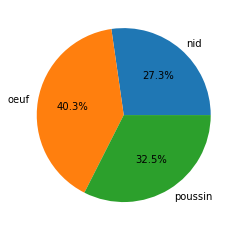

In [51]:
dfr = dfgci.groupby(["nature"])["nature"].count() 
# Compte des especes
dfr
Grap = plt.pie(dfr, labels=dfr.index, autopct='%1.1f%%')

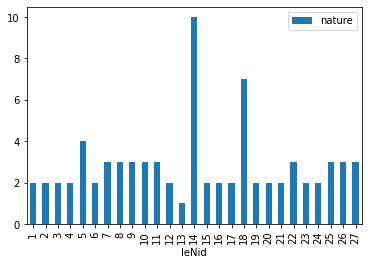

In [58]:
dfr = dfgci.groupby(["leNid"])["nature"].count() 

dfr
# Compte des meteos sur les observation
Grap = dfr.plot.bar()
plt.legend(loc='upper right')